##Import libraries

In [265]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

##Import dataset

In [266]:
dataframe = pd.read_csv('/content/Placement_Data_Full_Class.csv')


In [267]:
dataframe

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [268]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


##Who is getting more placements girls or boys?

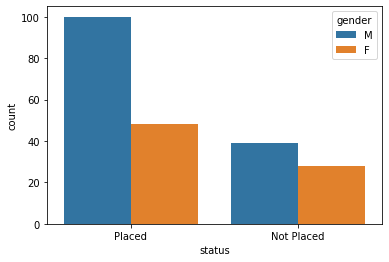

In [269]:
sns.countplot(dataframe['status'],hue=dataframe['gender'])

##Does board choosen (Central or State board) in 10th matter for getting placed?

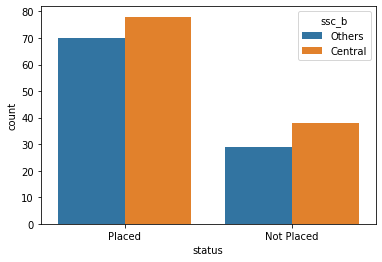

In [270]:
sns.countplot(dataframe['status'],hue=dataframe['ssc_b'])

Better to choose central board byu seeing graph infers thats the other board students are getting less placed and ratio of student not getting placed is 40:25 here central board students are high which infers that most of them will get offers.

##Does student academic perfromance matter in getting placed?

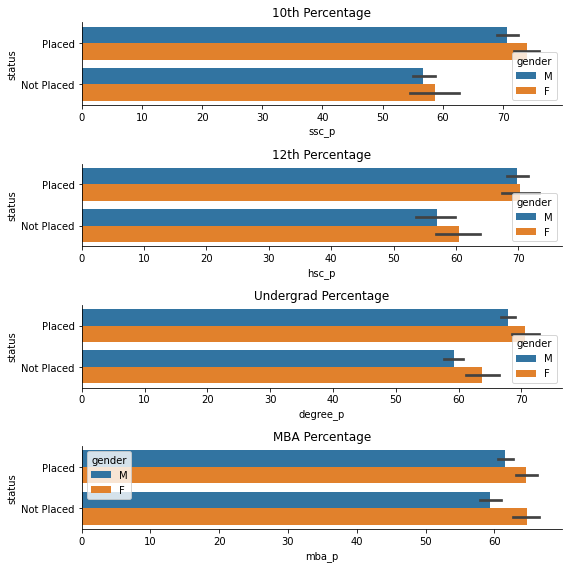

In [271]:
plt.figure(figsize=(8,8))

plt.subplot(4,1,1)
sns.barplot(y='status',x='ssc_p',hue='gender',data=dataframe,orient='h')
plt.title('10th Percentage')
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.subplot(4,1,2)
sns.barplot(y='status',x='hsc_p',hue='gender',data=dataframe,orient='h')
plt.title('12th Percentage')
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.subplot(4,1,3)
sns.barplot(y='status',x='degree_p',hue='gender',data=dataframe,orient='h')
plt.title('Undergrad Percentage')
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.subplot(4,1,4)
sns.barplot(y='status',x='mba_p',hue='gender',data=dataframe,orient='h')
plt.title('MBA Percentage')
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

Looking at the bar charts it is clear that the students who got placed had performed better in their 10th, 12th and undergrad

But the performance for placed and unplaced students in their mba is almost similar and hence not a deciding factor for getting placed

Furthermore females have outperformed males in academics in all four levels of education.

##Does Work Exp matter in a student getting placed?

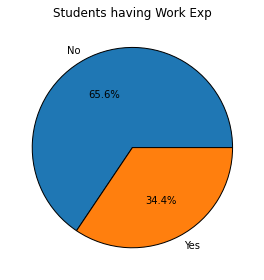

In [272]:
plt.pie(np.array(dataframe['workex'].value_counts()),labels=['No','Yes'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Students having Work Exp')

plt.tight_layout()

The pie chart for the percentage of students who had work exp we can see that most of them did not have any work exp and hence it is highly probable that majority of the students who got placed have no work exp

##Does Undergraduate stream matter while sitting for placements?

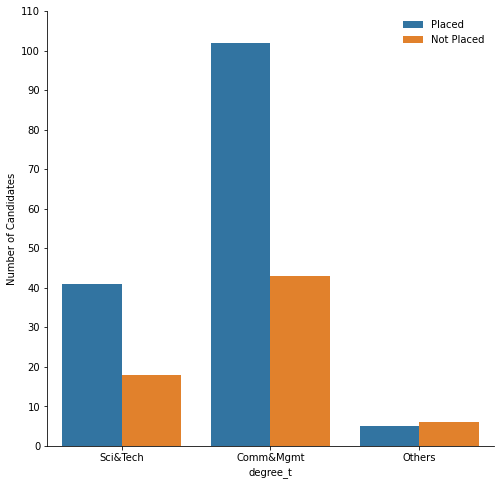

In [273]:
plt.figure(figsize=(8,8))

sns.countplot(x='degree_t',hue='status',data=dataframe)
plt.legend(frameon=False)
plt.ylabel('Number of Candidates')
plt.yticks(range(0,120,10))
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

##Data Preprocessing

In [274]:
dataframe['workex'].replace(to_replace = 'Yes', value = 1, inplace = True)
dataframe['workex'].replace(to_replace = 'No', value = 0, inplace = True)
dataframe['status'].replace(to_replace = 'Placed', value = 1, inplace = True)
dataframe['status'].replace(to_replace = 'Not Placed', value = 0, inplace = True)
dataframe.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


In [275]:
data = dataframe[['ssc_p', 'hsc_p', 'degree_p', 'etest_p','mba_p', 'status']]
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,67.00,91.00,58.00,55.0,58.80,1
1,79.33,78.33,77.48,86.5,66.28,1
2,65.00,68.00,64.00,75.0,57.80,1
3,56.00,52.00,52.00,66.0,59.43,0
4,85.80,73.60,73.30,96.8,55.50,1


##Result

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =1)

In [277]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [279]:
l_cla =  LogisticRegression()
k_cla = KNeighborsClassifier()
d_cla = DecisionTreeClassifier()
r_cla = RandomForestClassifier()
s_cla = SVC(kernel = 'linear')
ks_cla = SVC(kernel = 'rbf')

In [280]:
l_cla.fit(X_train,y_train)
k_cla.fit(X_train,y_train)
d_cla.fit(X_train,y_train)
r_cla.fit(X_train,y_train)
s_cla.fit(X_train,y_train)
ks_cla.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [281]:
l_pred = l_cla.predict(X_test)
k_pred = k_cla.predict(X_test)
d_pred = d_cla.predict(X_test)
r_pred = r_cla.predict(X_test)
s_pred = s_cla.predict(X_test)
ks_pred = ks_cla.predict(X_test)

In [282]:
from sklearn.metrics import confusion_matrix
l_c = confusion_matrix(y_test, l_pred)
k_c = confusion_matrix(y_test, k_pred)
d_c = confusion_matrix(y_test, d_pred)
r_c = confusion_matrix(y_test, r_pred)
s_c = confusion_matrix(y_test, s_pred)
ks_c = confusion_matrix(y_test, ks_pred)

In [283]:
from sklearn.metrics import accuracy_score
l_a = accuracy_score(y_test, l_pred)
k_a = accuracy_score(y_test, k_pred)
d_a = accuracy_score(y_test, d_pred)
r_a = accuracy_score(y_test, r_pred)
s_a = accuracy_score(y_test, s_pred)
ks_a = accuracy_score(y_test, ks_pred)

In [284]:
print('Logistic Regression: ' + str(l_a) + '\nKNN: ' + str(k_a) + '\nDecision Tree: ' + str(d_a) + '\nRandom Forest: ' + str(r_a) + '\nLinear SVC: ' + str(s_a) + '\nKernel SVC: ' + str(l_a))

Logistic Regression: 0.9090909090909091
KNN: 0.8636363636363636
Decision Tree: 0.6818181818181818
Random Forest: 0.8636363636363636
Linear SVC: 0.9545454545454546
Kernel SVC: 0.9090909090909091
